Libraries

In [202]:
!pip install -q yahoofinancials

In [203]:
!pip install -q pandas_ta

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import date, time
import yfinance as yf
import pandas_ta as ta
from yahoofinancials import YahooFinancials
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

Dataset

In [205]:
df = yf.download('TSLA',
                 start='2015-01-01',
                 end=date.today())

[*********************100%***********************]  1 of 1 completed


In [206]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,14.858000,14.883333,14.217333,14.620667,14.620667,71466000
2015-01-05,14.303333,14.433333,13.810667,14.006000,14.006000,80527500
2015-01-06,14.004000,14.280000,13.614000,14.085333,14.085333,93928500
2015-01-07,14.223333,14.318667,13.985333,14.063333,14.063333,44526000
2015-01-08,14.187333,14.253333,14.000667,14.041333,14.041333,51637500


In [207]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-31,267.480011,269.079987,263.779999,267.429993,267.429993,84582200
2023-08-01,266.260010,266.470001,260.250000,261.070007,261.070007,83166000
2023-08-02,255.570007,259.519989,250.490005,254.110001,254.110001,101752900
2023-08-03,252.039993,260.489990,252.000000,259.320007,259.320007,97569100
2023-08-04,260.970001,264.769989,253.110001,253.860001,253.860001,99242600


In [208]:
df.shape

(2162, 6)

In [209]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2162.000000,2162.000000,2162.000000,2162.000000,2162.000000,2.162000e+03
mean,96.368932,98.533930,94.024005,96.335532,96.335532,1.140508e+08
std,109.297503,111.788750,106.517746,109.181614,109.181614,7.873792e+07
min,9.488000,10.331333,9.403333,9.578000,9.578000,1.062000e+07
25%,16.507667,16.728334,16.317166,16.513000,16.513000,6.495788e+07
50%,22.687333,23.123000,22.307666,22.711333,22.711333,9.132640e+07
75%,197.227505,200.780006,191.994999,196.764999,196.764999,1.347308e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


Analysis

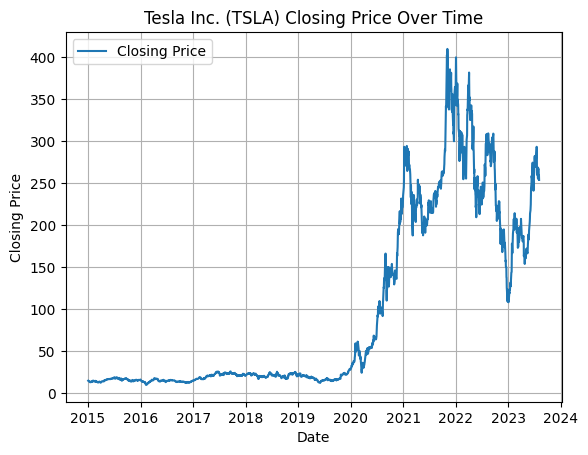

In [210]:
sns.lineplot(x=df.index, y=df['Close'], label='Closing Price')
plt.title('Tesla Inc. (TSLA) Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid()

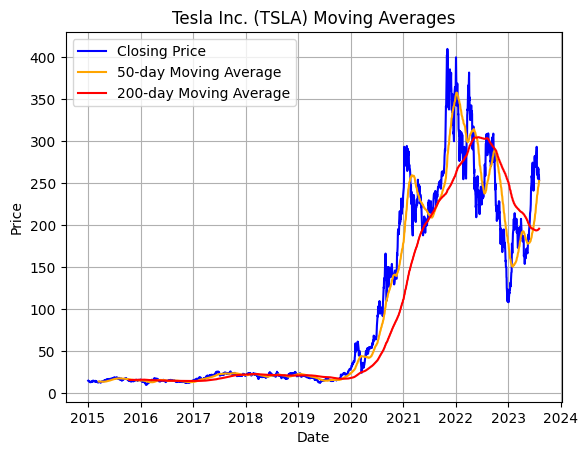

In [211]:
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()
sns.lineplot(x=df.index, y=df['Close'], color='blue', label='Closing Price')
sns.lineplot(x=df.index, y=df['MA50'], color='orange', label='50-day Moving Average')
sns.lineplot(x=df.index, y=df['MA200'], color='red', label='200-day Moving Average')
plt.title('Tesla Inc. (TSLA) Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()

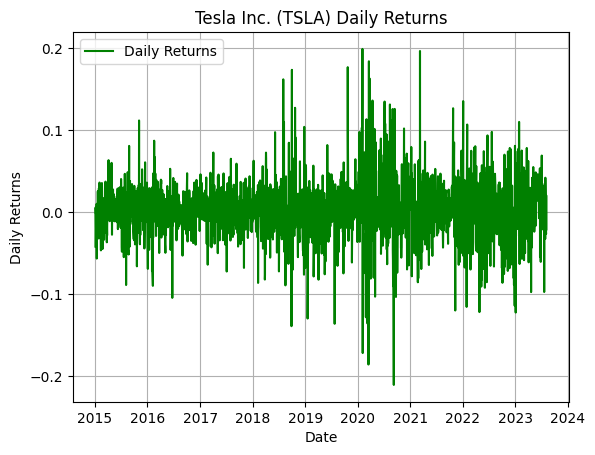

In [212]:
daily_returns = df['Close'].pct_change()
sns.lineplot(x=df.index, y=daily_returns, color='green', label='Daily Returns')
plt.title('Tesla Inc. (TSLA) Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.grid()

In [213]:
df.ta.sma(length=20, append=True)
df.ta.sma(length=50, append=True)
df.ta.sma(length=200, append=True)

Date
2015-01-02          NaN
2015-01-05          NaN
2015-01-06          NaN
2015-01-07          NaN
2015-01-08          NaN
                ...    
2023-07-31    194.89340
2023-08-01    195.11255
2023-08-02    195.27450
2023-08-03    195.54615
2023-08-04    195.71870
Name: SMA_200, Length: 2162, dtype: float64

In [214]:
df.ta.bbands(length=20, append=True)

,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0
Date,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,NaN,NaN,NaN,NaN,NaN
2015-01-06,NaN,NaN,NaN,NaN,NaN
2015-01-07,NaN,NaN,NaN,NaN,NaN
2015-01-08,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2023-07-31,252.984557,273.505500,294.026443,15.005872,0.351968
2023-08-01,251.578785,272.568000,293.557215,15.401086,0.226098
2023-08-02,249.218048,271.149500,293.080951,16.176649,0.111528


In [215]:
df['RSI(2)'] = ta.rsi(df['Close'], timeperiod=2)
df['RSI(7)'] = ta.rsi(df['Close'], timeperiod=7)
df['RSI(14)'] = ta.rsi(df['Close'], timeperiod=14)
df['RSI(10)'] = ta.rsi(df['Close'], timeperiod=10)

In [216]:
df['CCI(30)'] = ta.cci(df['High'], df['Low'], df['Close'], timeperiod=30)
df['CCI(50)'] = ta.cci(df['High'], df['Low'], df['Close'], timeperiod=50)
df['CCI(100)'] = ta.cci(df['High'], df['Low'], df['Close'], timeperiod=100)

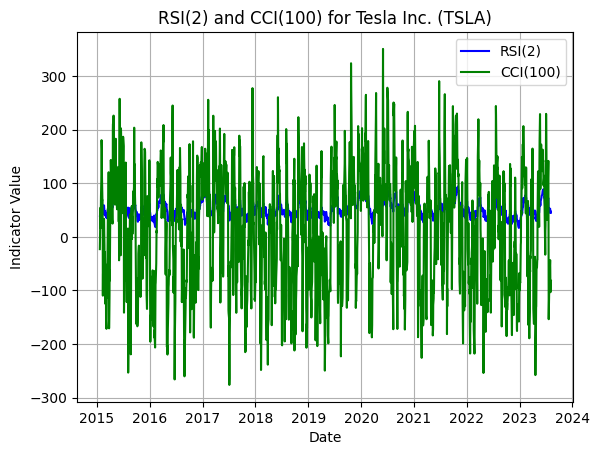

In [217]:
sns.lineplot(x=df.index, y=df['RSI(2)'], label='RSI(2)', color='blue')
sns.lineplot(x=df.index, y=df['CCI(100)'], label='CCI(100)', color='green')
plt.title('RSI(2) and CCI(100) for Tesla Inc. (TSLA)')
plt.xlabel('Date')
plt.ylabel('Indicator Value')
plt.legend()
plt.grid()

In [218]:
df = df.dropna()

In [219]:
df['LABEL'] = np.where( df['Open'].shift(-2).gt(df['Open'].shift(-1)),"1","0")
df = df.dropna()

<ipython-input-219-590619ea556b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LABEL'] = np.where( df['Open'].shift(-2).gt(df['Open'].shift(-1)),"1","0")


In [220]:
X = df.drop(labels=['LABEL'], axis=1).values
y = df['LABEL'].values

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [222]:
rf_classifier = RandomForestClassifier(n_estimators=100,random_state=0)

grid_search = GridSearchCV(rf_classifier, param_grid, cv=10)
grid_search.fit(X_train, y_train)


best_rf_classifier = grid_search.best_estimator_
y_pred = best_rf_classifier.predict(X_test)

print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


Text(0.5, 1.0, 'Confusion Matrix')

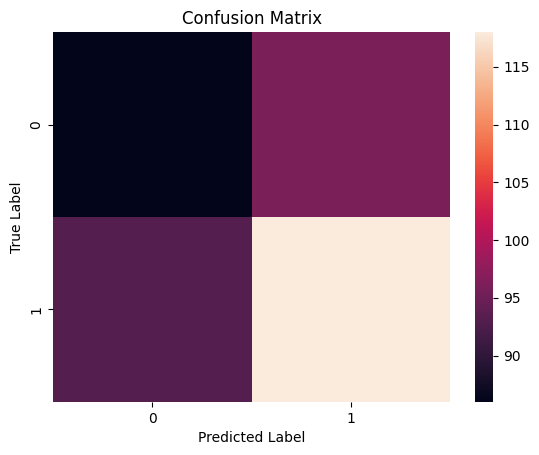

In [225]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')